In [2]:
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime


In [3]:
import yfinance as yf
data = yf.download('MSFT', start = '2012-01-01', end='2017-01-01')

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238756,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738583,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960724,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301888,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008339,59706800
...,...,...,...,...,...,...
2016-12-23,63.450001,63.540001,62.799999,63.240002,57.634758,12403800
2016-12-27,63.209999,64.070000,63.209999,63.279999,57.671219,11763200
2016-12-28,63.400002,63.400002,62.830002,62.990002,57.406921,14653300


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [6]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**visualization of data**

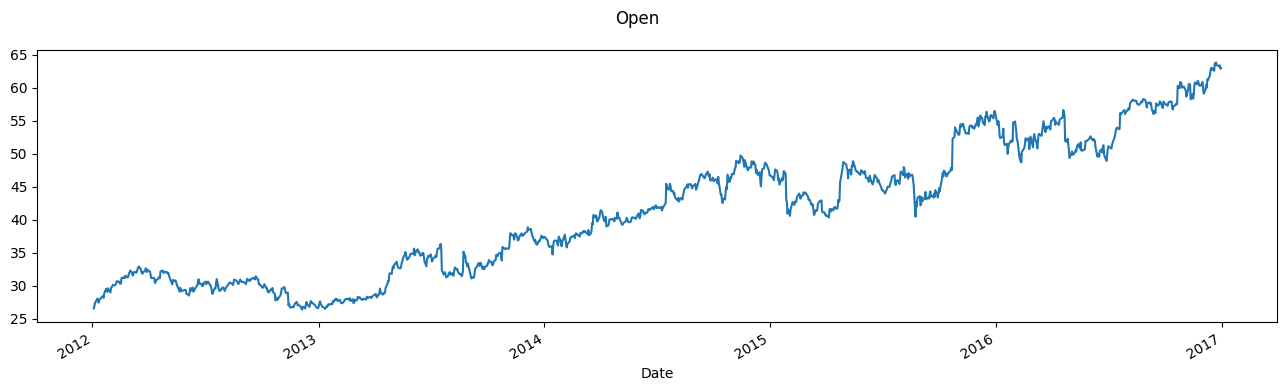

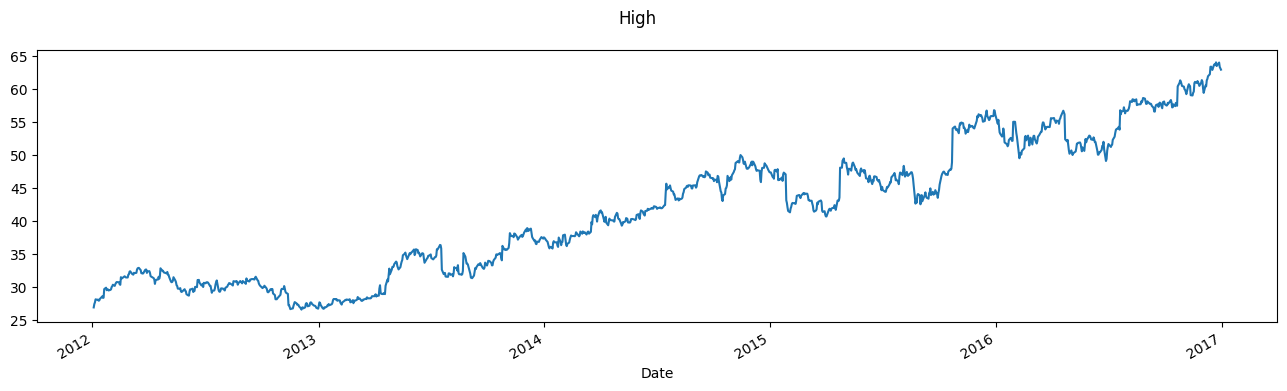

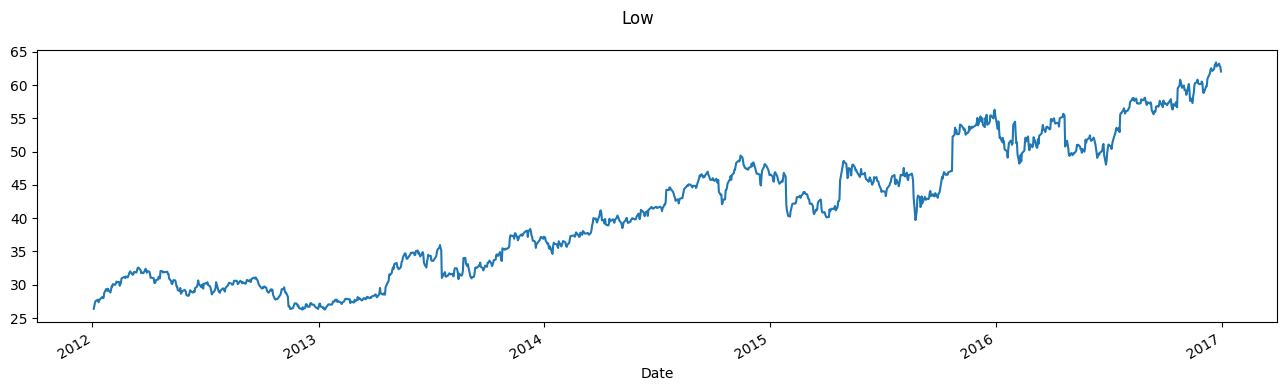

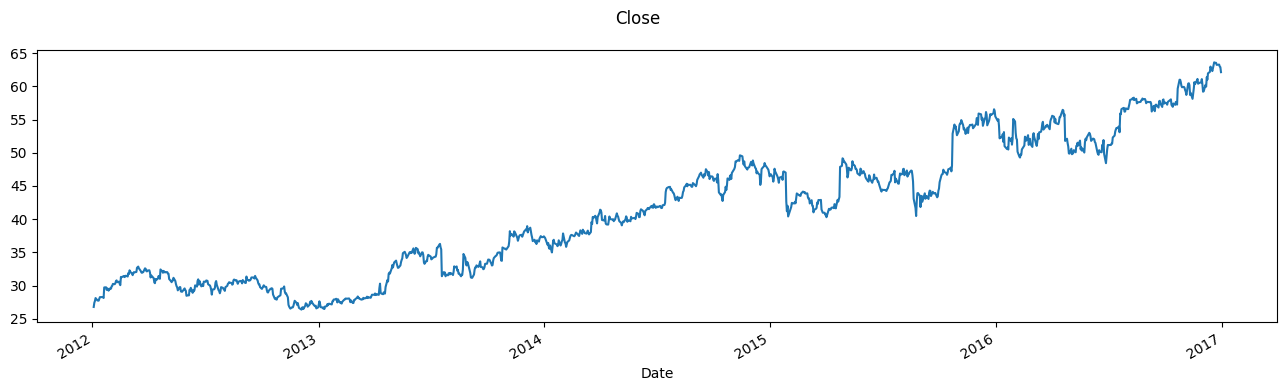

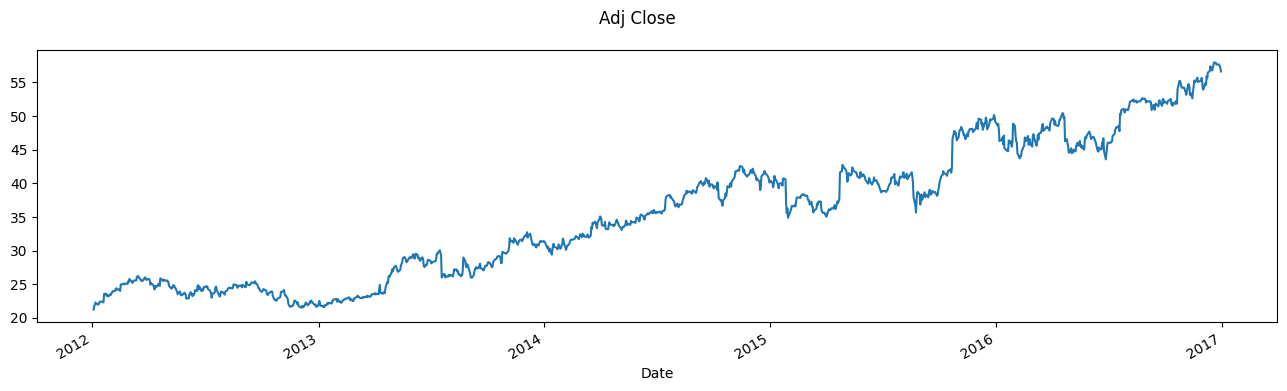

In [7]:
import matplotlib.pyplot as plt
for i in data.columns:
  if i!="Volume":
    fig = plt.figure(figsize=(16,4))
    fig.suptitle(i)
    data[i].plot()



**Calculating SMA, CMA and EMA**

In [8]:
data["seasonal_SMA_Adj_close"]=data["Adj Close"].rolling(12).mean()
data.head()
# data=data.drop("seasonal SMA Adj close",axis=1)
# data.head()

,Open,High,Low,Close,Adj Close,Volume,seasonal_SMA_Adj_close
Date,,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238756,64731500,NaN
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738583,80516100,NaN
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960724,56081400,NaN
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301888,99455500,NaN
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008339,59706800,NaN


In [9]:
data["seasonal_CMA_Adj_close"]=data["Adj Close"].expanding().mean()
data.head()

,Open,High,Low,Close,Adj Close,Volume,seasonal_SMA_Adj_close,seasonal_CMA_Adj_close
Date,,,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238756,64731500,NaN,21.238756
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738583,80516100,NaN,21.488669
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960724,56081400,NaN,21.646021
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301888,99455500,NaN,21.809988
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008339,59706800,NaN,21.849658


In [10]:
data["Exponential_MA_Adj_close"]=data["Adj Close"].ewm(span=18).mean()

**Ploting CMA, SMA and EMA**

Since moving averages used to reduce noice and ideantify treands here we can see clearly CMA, SMA and EWMA work diffrently CMA and SMA can reduce noise effectively while EWMA help to ideantify treand clearly.

<Axes: xlabel='Date'>

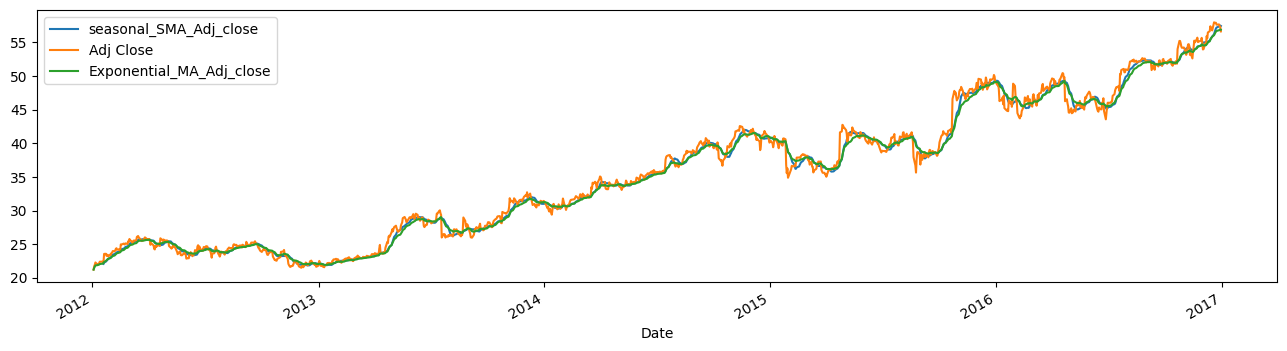

In [11]:
# fig=plt.figure(figsize=(16,4))
fig.suptitle("SMA_of_adj_close and Adj close")
data[["seasonal_SMA_Adj_close","Adj Close","Exponential_MA_Adj_close"]].plot(figsize=(16, 4))

In [12]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,seasonal_SMA_Adj_close,seasonal_CMA_Adj_close,Exponential_MA_Adj_close
Date,,,,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238756,64731500,NaN,21.238756,21.238756
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738583,80516100,NaN,21.488669,21.502553
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960724,56081400,NaN,21.646021,21.672543
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301888,99455500,NaN,21.809988,21.857016
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008339,59706800,NaN,21.849658,21.894357


<Axes: xlabel='Date'>

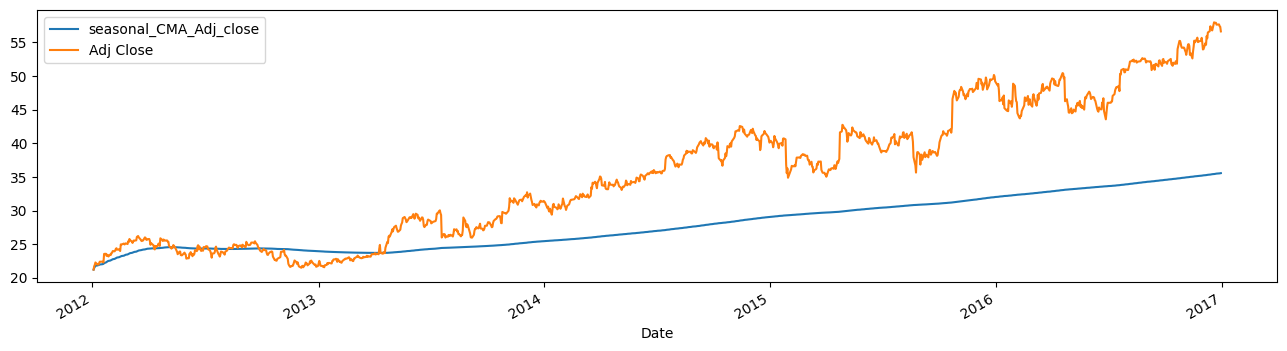

In [13]:
data[["seasonal_CMA_Adj_close","Adj Close"]].plot(figsize=(16, 4))

**Analyzing noise, seasonility and trend of Adj close column**

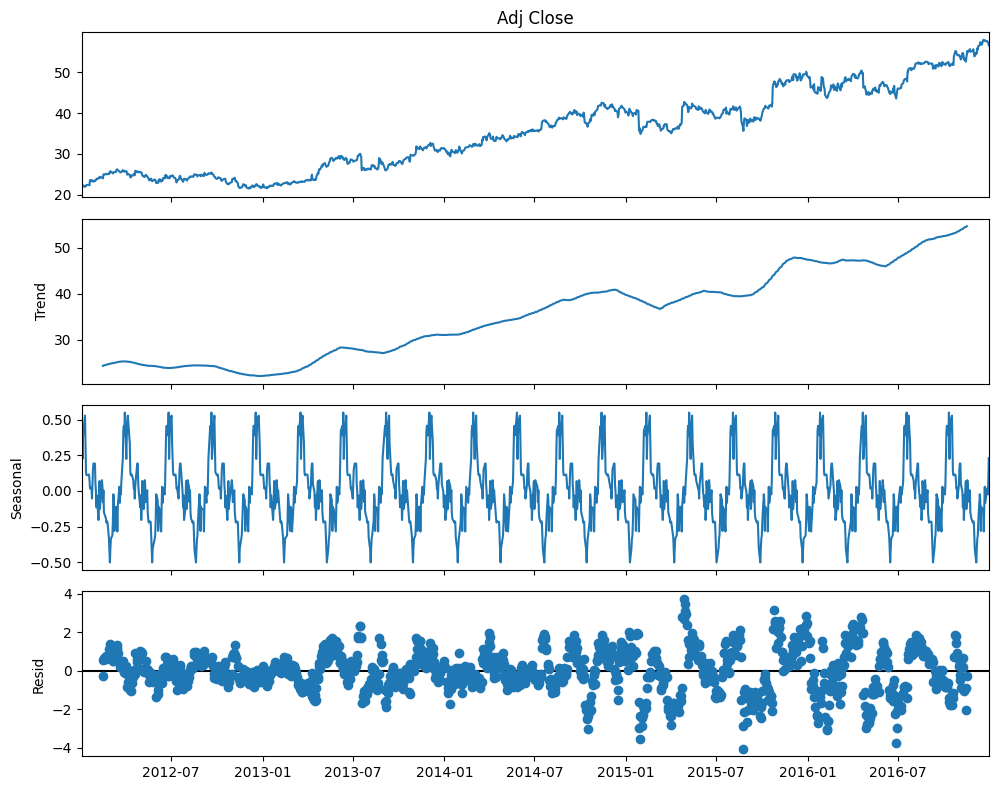

<Figure size 1600x400 with 0 Axes>

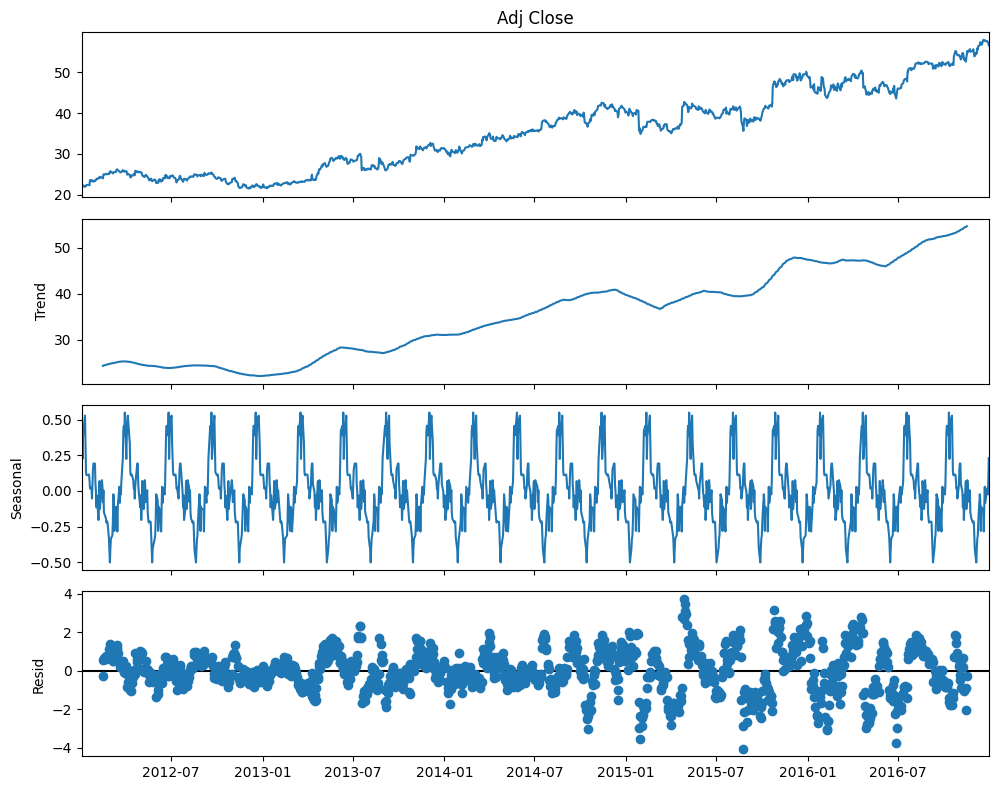

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig=plt.figure(figsize=(16,4))
plt.rcParams.update({"figure.figsize" : (10,8)})

components_add = seasonal_decompose(x=pd.Series(data["Adj Close"]), model="additive",period=60)

components_add.plot()


here we can see noise component is very less in or around 0 in additive compared to multiplicative.

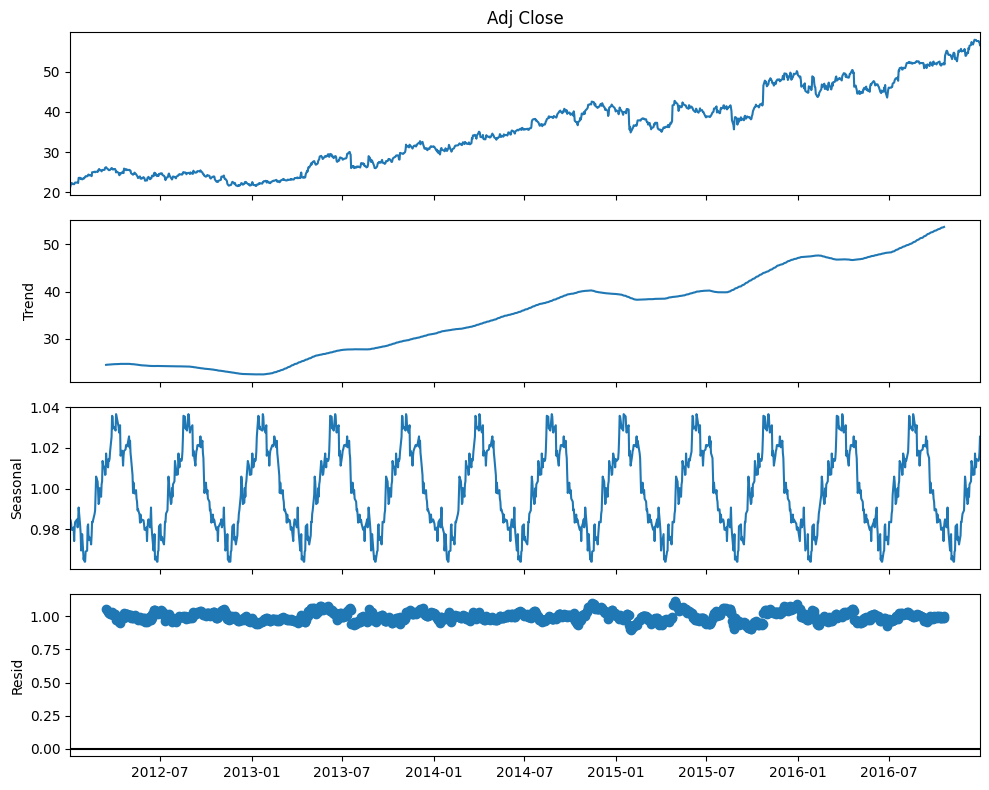

<Figure size 1600x400 with 0 Axes>

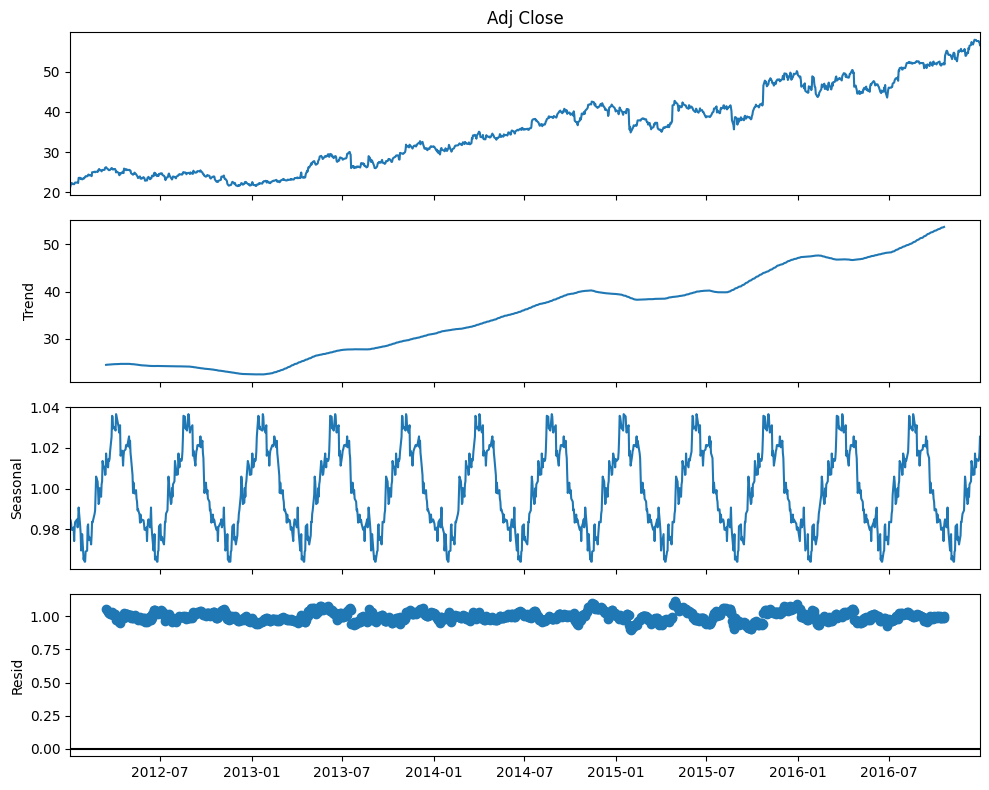

In [17]:
fig=plt.figure(figsize=(16,4))
plt.rcParams.update({"figure.figsize" : (10,8)})

components_mul = seasonal_decompose(x=pd.Series(data["Adj Close"]), model="multiplicative",period=100)

components_mul.plot()


Cheking for Stationary data since by only visualizing it is impossible.

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
def adf_test(series):
  result=adfuller(series)
  print("adf_statistics: {}".format(result[0]))
  print("p_value: {}".format(result[1]))
  if result[1]<=0.05:
    print("data is stationary ")
  else: print("data is not stationary")

In [22]:
adf_test(data["Adj Close"])

adf_statistics: -0.33662541212266206
p_value: 0.9201545153598916
data is not stationary


here we can see p_value is greater than .05 i.e data is not stationary to make data stationary we do diffrencing.


In [23]:
data["first_diffrence"]=data["Adj Close"]-data["Adj Close"].shift(1)

In [24]:
adf_test(data["first_diffrence"].dropna())

adf_statistics: -35.08081627199068
p_value: 0.0
data is stationary 


In [30]:
data["12_diffrencing"]=data["Adj Close"]-data["Adj Close"].shift(12)
adf_test(data["12_diffrencing"].dropna())

adf_statistics: -8.23083778505322
p_value: 6.069268622306778e-13
data is stationary 


after shift of 1 we get stationary data but we also see for 12 month diffrencing because it is a seasonal data. for now let (d=1)

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [56]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,seasonal_SMA_Adj_close,seasonal_CMA_Adj_close,Exponential_MA_Adj_close,first_diffrence,12_diffrencing
Date,,,,,,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238756,64731500,NaN,21.238756,21.238756,NaN,NaN
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738583,80516100,NaN,21.488669,21.502553,0.499826,NaN
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960724,56081400,NaN,21.646021,21.672543,0.222141,NaN
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301888,99455500,NaN,21.809988,21.857016,0.341164,NaN
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008339,59706800,NaN,21.849658,21.894357,-0.293549,NaN


Plotting auto corelation and partial auto corelation

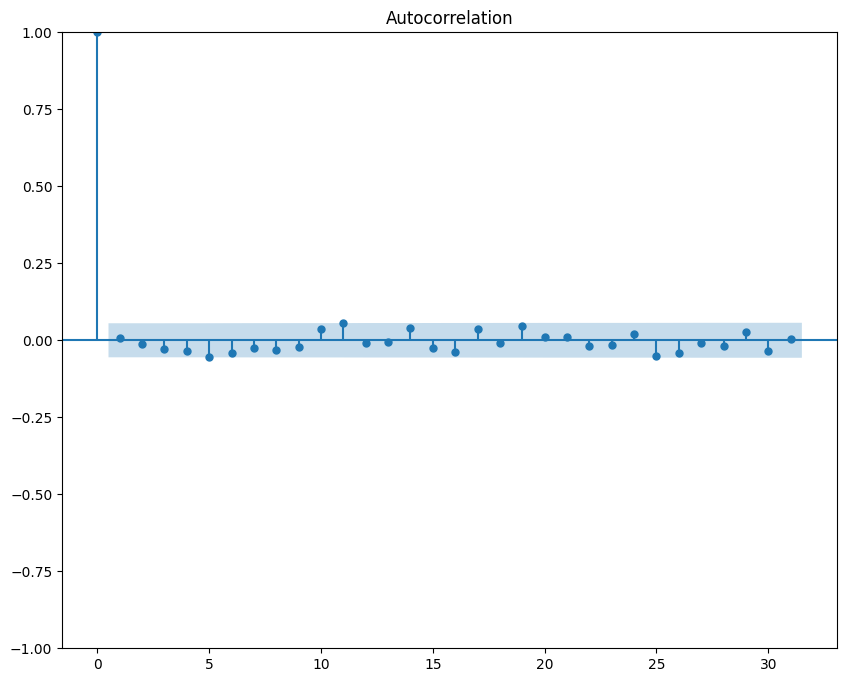

In [64]:
plot_acf(data["first_diffrence"].dropna())
plt.show()

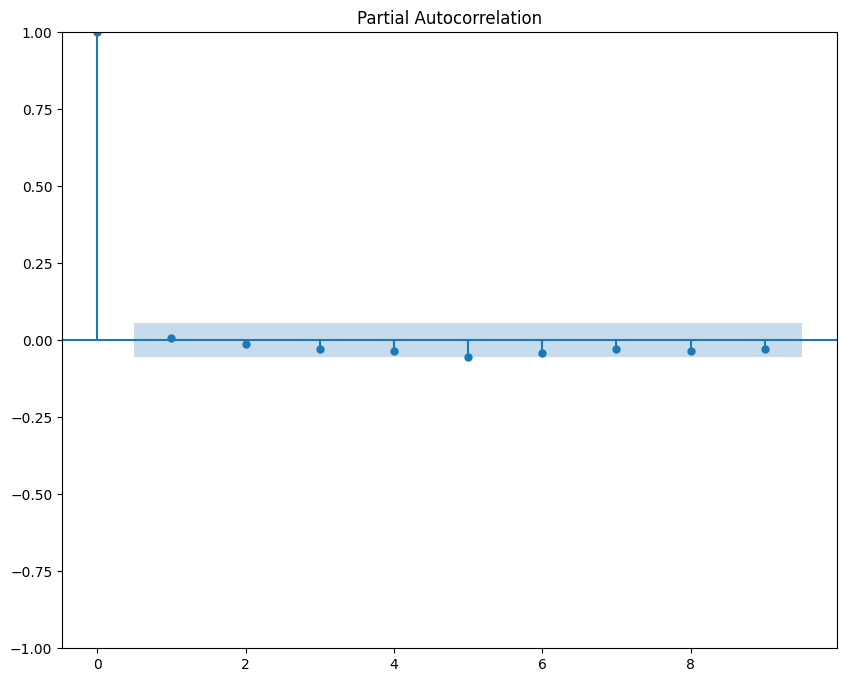

In [65]:
plot_pacf(data["first_diffrence"].dropna(),lags=9)
plt.show()

p,q both equals to 1 and diffrencing also equals to 1

**forcasting**

In [76]:
data

,Open,High,Low,Close,Adj Close,Volume,seasonal_SMA_Adj_close,seasonal_CMA_Adj_close,Exponential_MA_Adj_close,first_diffrence,12_diffrencing
Date,,,,,,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238756,64731500,NaN,21.238756,21.238756,NaN,NaN
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738583,80516100,NaN,21.488669,21.502553,0.499826,NaN
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960724,56081400,NaN,21.646021,21.672543,0.222141,NaN
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301888,99455500,NaN,21.809988,21.857016,0.341164,NaN
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008339,59706800,NaN,21.849658,21.894357,-0.293549,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,63.450001,63.540001,62.799999,63.240002,57.634758,12403800,57.201859,35.503653,56.702421,-0.282528,1.704247
2016-12-27,63.209999,64.070000,63.209999,63.279999,57.671219,11763200,57.374259,35.521316,56.804399,0.036461,2.068794
2016-12-28,63.400002,63.400002,62.830002,62.990002,57.406921,14653300,57.451725,35.538741,56.867823,-0.264297,0.929592


In [92]:
from datetime import datetime,timedelta
train_data_end=datetime(2014,1,30)
test_data_end=datetime(2014,12,3)



In [93]:
train_data=data[:train_data_end]
test_data=data[train_data_end+timedelta(days=1):test_data_end]

In [94]:

pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [95]:
train_data.shape

(522, 11)

In [97]:
test_data.shape

(213, 11)

In [104]:
from statsmodels.tsa.arima.model import ARIMA

In [114]:
arima=ARIMA(data["Adj Close"],order=(5,12,1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [115]:
Model_arima_fit=arima.fit()
Model_arima_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1258
Model:                ARIMA(5, 12, 1)   Log Likelihood               -5375.136
Date:                Thu, 29 Feb 2024   AIC                          10764.272
Time:                        19:22:27   BIC                          10800.166
Sample:                             0   HQIC                         10777.768
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.3078      0.017   -195.134      0.000      -3.341      -3.275
ar.L2         -5.1478      0.052    -98.097      0.000      -5.251      -5.045
ar.L3         -4.7043      0.074    -63.911      0.000      -4.849      -4.560
ar.L4         -2.5242      0.055    -46.089      0.000      -2.632      -2.417
ar.L5         -0.6431      0.018    -34.891      0.000      -0.679      -0.607
ma.L1         -0.9897      0.049    -20.335      0.000      -1.085      -0.894
sigma2       307.0549     16.700     18.386      0.000     274.323     339.787
===================================================================================
Ljung-Box (L1) (Q):                 230.80   Jarque-Bera (JB):               410.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.42   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:
pred=Model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residual=data["Adj Close"]-pred

<Axes: xlabel='Date'>

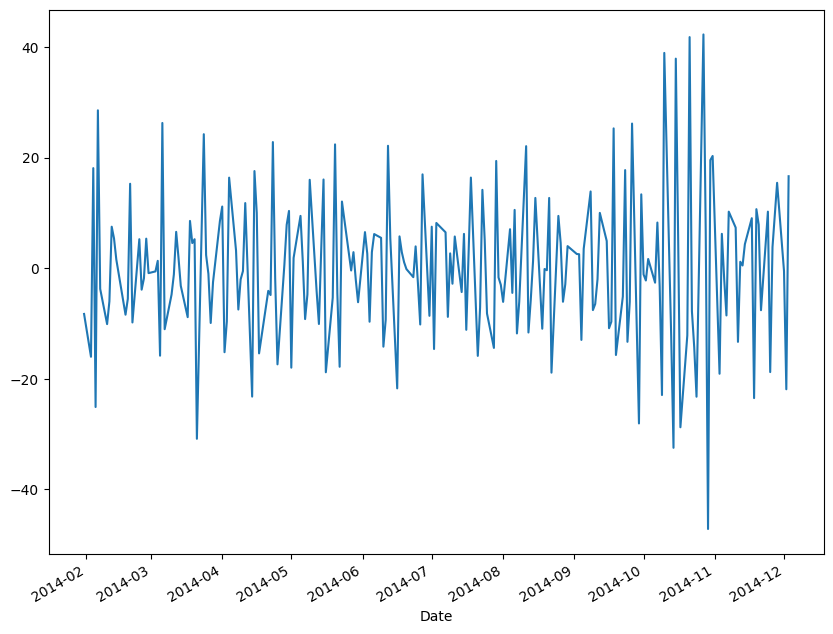

In [126]:
residual.plot()

In [131]:
data[["Adj Close","pred"]].plot()

KeyError: "['pred'] not in index"